In [9]:
import json
with open('../../stats/2023-10-25/stmtByQualifier.json') as json_data:
    freq = json.load(json_data)

with open('../../stats/2023-10-25/stmtByPropertyByQualifier.json') as json_data:
    div = json.load(json_data)

ff = []
dd = []
for q in div:
    ff.append(freq[q])
    dd.append(len(div[q]))
print(len(dd))

11207


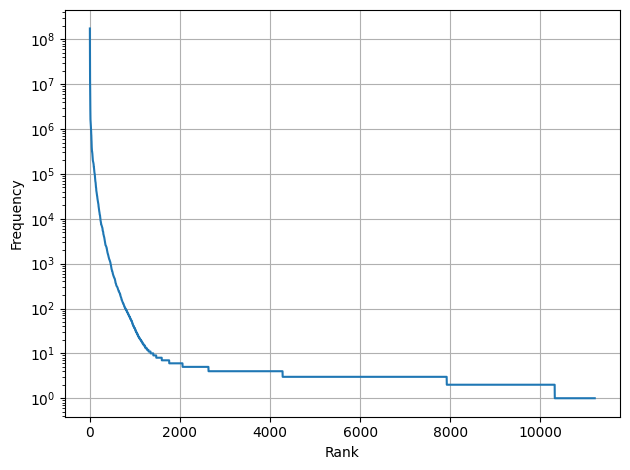

In [23]:
import matplotlib.pyplot as plt
import numpy as np

ffs = sorted(ff, reverse=True)
fig, ax = plt.subplots()

ax.plot(range(len(ffs)), ffs)

ax.set_xlabel(r'Rank', fontsize=10)
ax.set_ylabel(r'Frequency', fontsize=10)
#ax.set_title('Diversity / Frequency Plot')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
fig.tight_layout()
plt.savefig('fig-freqs.pdf')
plt.show()

11207


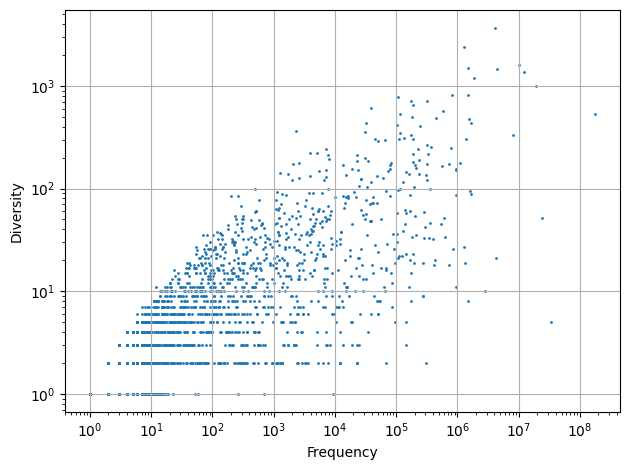

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

fig, ax = plt.subplots()
# ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

print(len(ff))
ax.scatter(ff, dd, s=1)

ax.set_xlabel(r'Frequency', fontsize=10)
ax.set_ylabel(r'Diversity', fontsize=10)
#ax.set_title('Diversity / Frequency Plot')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
fig.tight_layout()
plt.savefig('fig-freq-nbqprop.pdf')
plt.show()


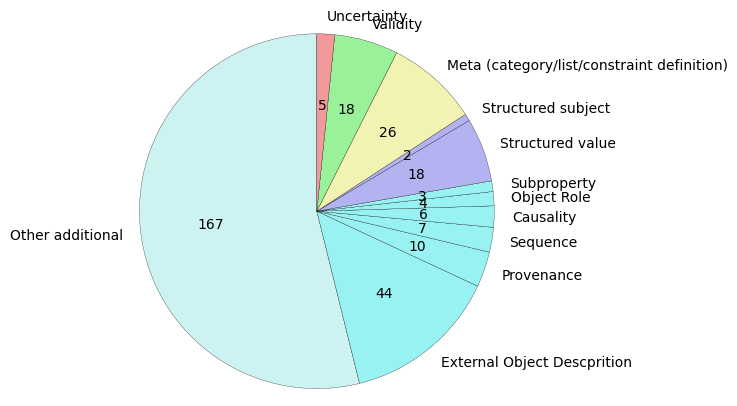

In [83]:
add_color = (0.6,0.95,0.95) # (0.85,0.85,0.85)

qual_by_cat_avg_div = [
 ('Other additional',167,6.74, (0.8,0.95,0.95))
,('External Object Descprition',44,15.49, add_color)
,('Provenance',10,99.07, add_color)
,('Sequence',7,14.46, add_color)
,('Causality',6,16.21, add_color)
,('Object Role',4,31.02, add_color)
,('Subproperty',3,20.92, add_color)
,('Structured value',18,8.54, (0.7,0.7,0.95))
,('Structured subject',2,7.88, (0.7,0.7,0.95))
,('Meta (category/list/constraint definition)',26,7.33, (0.95,0.95,0.7))
,('Validity',18,62.12, (0.6,0.95,0.6))
,('Uncertainty',5,35.49, (0.95,0.6,0.6))]

labels = list(map(lambda x : x[0], qual_by_cat_avg_div))

#labels = ['Validity','Struct Value','Struct subject','Meta','Uncertainty','Ext Obj Desc','Provenance','Sequence','Causality','Obj Role','Subproperty','Other Additional']

# sizes = [18 ,18 , 2, 26, 5, 44, 10, 7, 6, 4, 3, 167]

sizes = list(map(lambda x : x[1], qual_by_cat_avg_div))

colors = [(0.4, 0.6, 1), 'yellow', 'green', 'orange', 'violet', (1,0,0), (1,0.1, 0.1), (1, 0.2,0.2), (1,0.3,0.3), (1,0.4, 0.4), (1, 0.5,0.5),(1,0.6,0.6)]

colors = [(0.9,0.9,0.9), (0.7,0.7,0.7),(0.7,0.7,0.7), (0.6,0.6,0.6), (0.9,0.9,0.9), (0.7,0.7,0.7), (0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5)]

colors = [(0.6,0.95,0.6), (0.7,0.7,0.95),(0.7,0.7,0.95), (0.95,0.6,0.6), (0.95,0.95,0.7)] + [(0.7,0.95,0.95) for x in range(7)]

colors = list(map(lambda x : x[3], qual_by_cat_avg_div))

def pctf(p): 
    return round(p/100*sum(sizes))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=pctf, colors=colors, wedgeprops = {'linewidth': 0.2, 'linestyle': '-', 'edgecolor': 'black'}, #autopct='%1.1f%%',
  radius=1.2, startangle=90)

plt.savefig('figure1.pdf')
plt.show()